# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [74]:
df_cyber = pd.read_csv("ExportedDatasetsNew/cyberbullying_final.csv")

### 3.  Check first 10 lines

In [75]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
5,bully flushes kd,0
6,turkish state killed children last years,0
7,love best response hotcakes managed film nonco...,0
8,twitter basically angry letters generation,0
9,best pick line hi youre cute love people call ...,0


### 4. Check Datasets type values and sum & drop duplicates

In [76]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61286 entries, 0 to 61285
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61175 non-null  object
 1   cyberbullying_type  61286 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 957.7+ KB


In [77]:
df_cyber.shape

(61286, 2)

In [78]:
df_cyber.isnull().sum()

tweet_text            111
cyberbullying_type      0
dtype: int64

In [79]:
df_cyber = df_cyber.dropna()

In [80]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [81]:
df_cyber.tweet_text.duplicated().sum()

6765

In [82]:
df_cyber.duplicated(subset='tweet_text').sum()

6765

In [83]:
df_cyber.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

4900

In [84]:
df_cyber = df_cyber.drop_duplicates()

In [85]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56275 entries, 0 to 61285
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56275 non-null  object
 1   cyberbullying_type  56275 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [86]:
df_cyber['cyberbullying_type'].value_counts()

1    36995
0    19280
Name: cyberbullying_type, dtype: int64

In [87]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

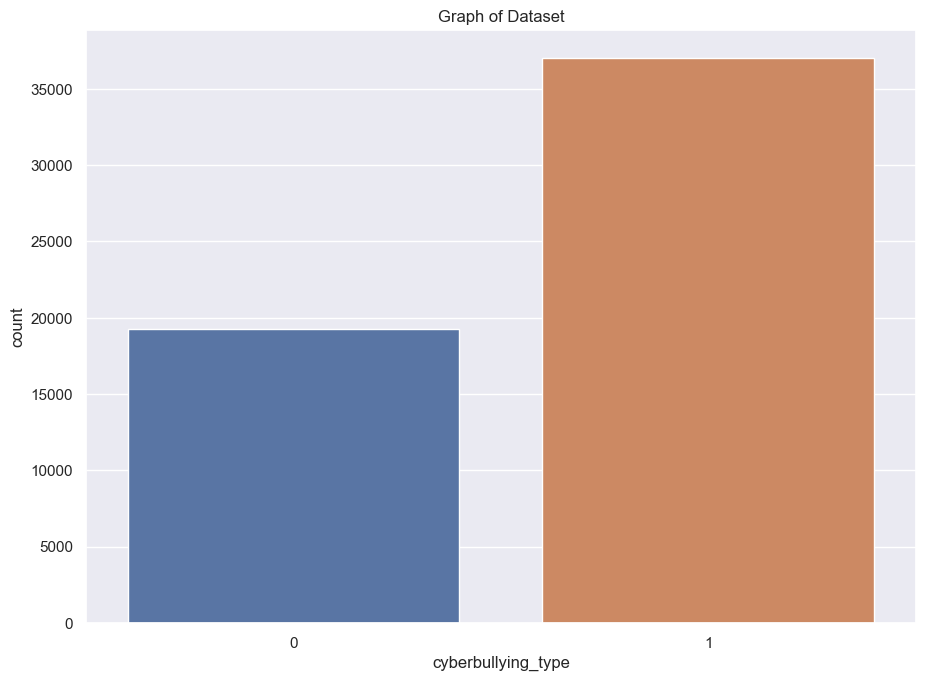

In [88]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df_cyber).set(title="Graph of Dataset")

### 7. Stopwords

In [89]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [91]:
df_cyber.dropna(axis = 0)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
...,...,...
61279,loving credit crunch,0
61280,thats killing smile flattered,0
61282,agree awful makes sense regardless last mistak...,0
61283,called yesterday guidance counselors office th...,0


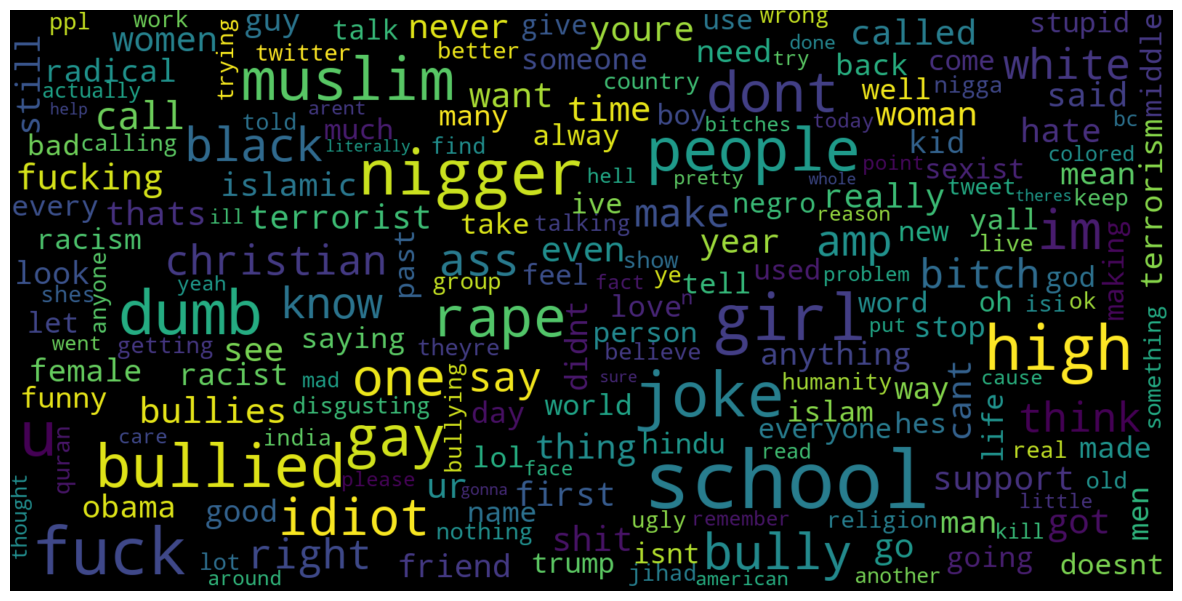

In [92]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

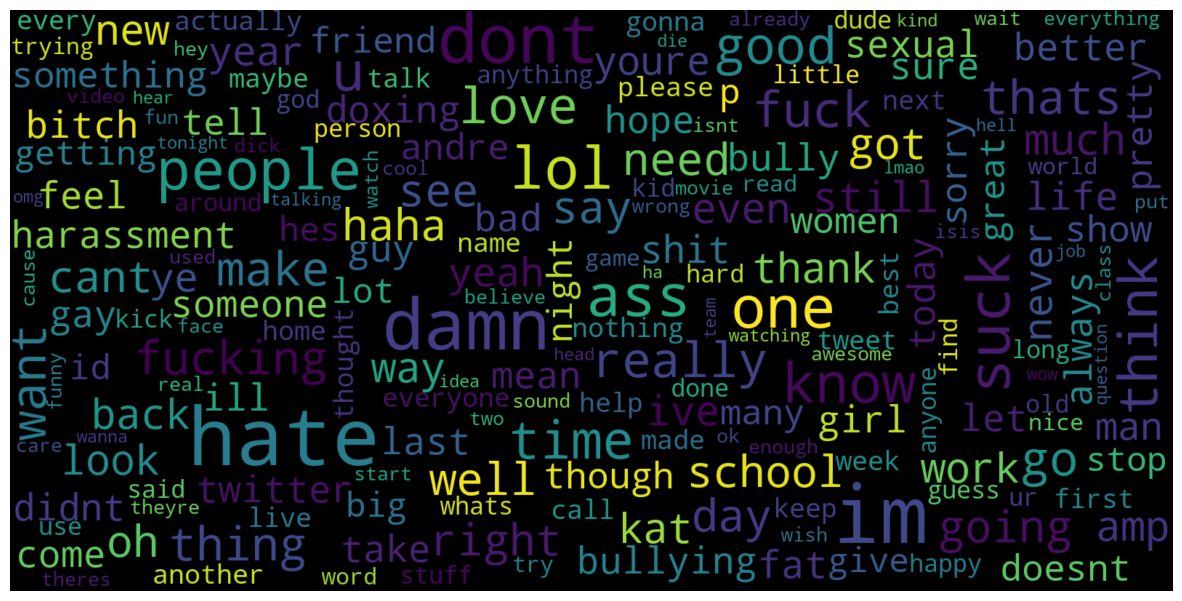

In [93]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

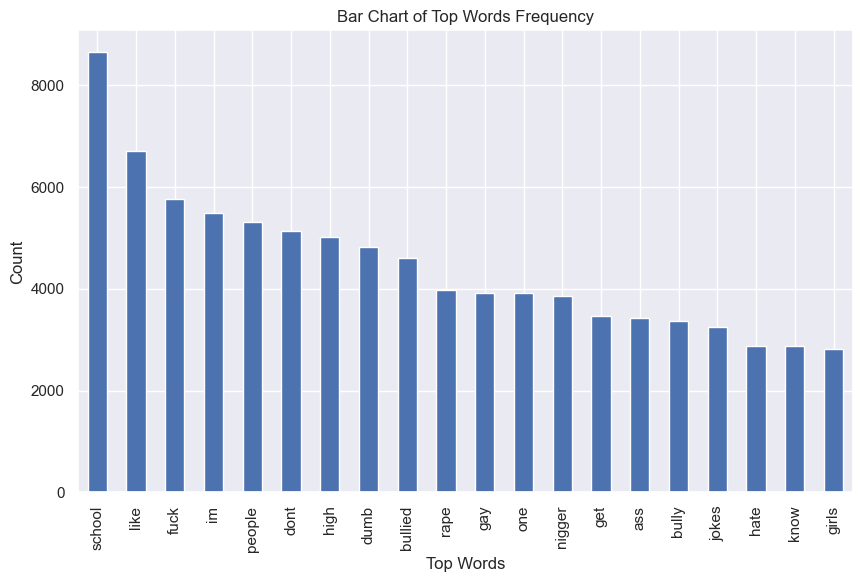

In [94]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [95]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['tweet_text'],
                                                    df_cyber['cyberbullying_type'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [96]:
x_train.shape

(45020,)

In [97]:
x_test.shape

(11255,)

In [98]:
y_train.shape

(45020,)

In [99]:
y_test.shape

(11255,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [101]:
print(x_train)

  (0, 11284)	0.09392167300395
  (0, 3975)	0.22850625918814776
  (0, 31153)	0.2841668943735723
  (0, 33311)	0.1841202900824732
  (0, 5840)	0.12050157406152587
  (0, 19952)	0.1769021764101701
  (0, 14431)	0.08999353648459527
  (0, 33798)	0.12038348369005288
  (0, 36492)	0.21168022365639502
  (0, 27494)	0.1870350698432121
  (0, 6067)	0.20397980671118482
  (0, 21804)	0.22636374743113472
  (0, 19609)	0.2950200224901703
  (0, 33336)	0.23549705536703822
  (0, 16867)	0.1689595215451791
  (0, 11894)	0.23620667613335797
  (0, 27066)	0.10006318113301726
  (0, 35102)	0.2614871815010937
  (0, 38442)	0.14837499450209643
  (0, 2929)	0.1285394376906954
  (0, 3634)	0.17579002978469518
  (0, 26002)	0.09992565501723931
  (0, 4105)	0.3477267238122682
  (0, 6760)	0.12552022857885284
  (0, 5712)	0.24889507087446933
  :	:
  (45018, 14881)	0.17684423159051207
  (45018, 41411)	0.21316891341392544
  (45018, 6760)	0.22142690806786688
  (45019, 35436)	0.328915458384359
  (45019, 33547)	0.28754506103200417
  (4501

In [102]:
print(x_test)

  (0, 28070)	0.27691446523406527
  (0, 21507)	0.2975743156121282
  (0, 14589)	0.5534212896268066
  (0, 13880)	0.40743424712484977
  (0, 8967)	0.3633045243045948
  (0, 4811)	0.32558954229095777
  (0, 2902)	0.35283337237326473
  (1, 41163)	0.4593733436879942
  (1, 38325)	0.3348352760128637
  (1, 22475)	0.6634579994210178
  (1, 2929)	0.32107015102193975
  (1, 404)	0.3655118468303194
  (2, 41720)	0.3365373677190357
  (2, 26825)	0.6539483391122596
  (2, 21608)	0.5731348714000781
  (2, 17107)	0.3614008703452103
  (3, 42416)	0.25697773110429784
  (3, 41957)	0.17201567775450138
  (3, 35706)	0.18262251324618375
  (3, 34727)	0.2144012613141676
  (3, 34573)	0.1843544977718516
  (3, 34039)	0.3644170304347217
  (3, 31095)	0.22656110088947545
  (3, 30802)	0.12627482420396513
  (3, 30327)	0.4554245343430596
  :	:
  (11252, 37617)	0.348311731953669
  (11252, 33623)	0.4482610701679479
  (11252, 21806)	0.3320803468757885
  (11252, 13800)	0.348311731953669
  (11252, 11157)	0.3134886363723563
  (11252, 94

### Logistic Regression (LR)

In [103]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8907374500222124
0.8457574411372724


In [104]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      3992
           1       0.87      0.89      0.88      7263

    accuracy                           0.85     11255
   macro avg       0.83      0.83      0.83     11255
weighted avg       0.84      0.85      0.85     11255



### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9735228787205686
0.8056863616170591


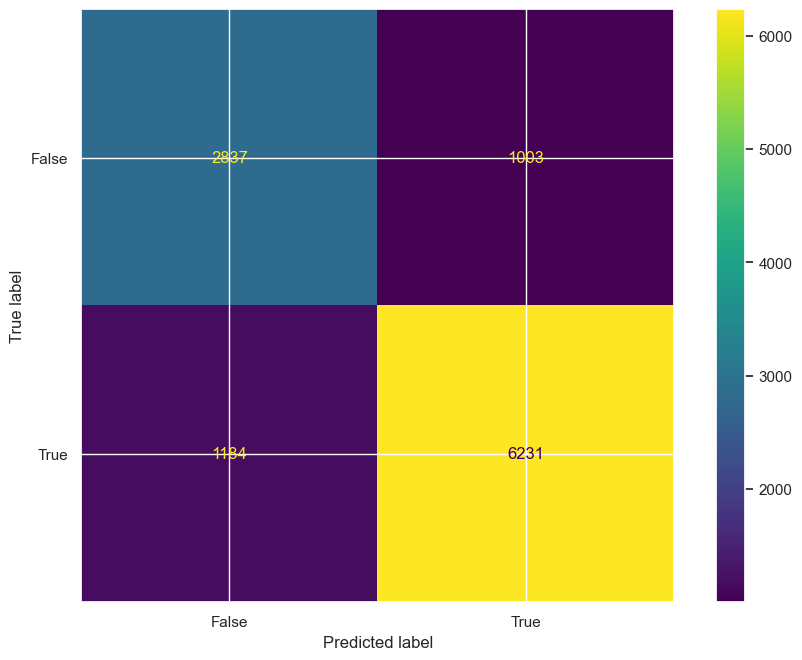

In [106]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [107]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      4021
           1       0.84      0.86      0.85      7234

    accuracy                           0.81     11255
   macro avg       0.79      0.78      0.79     11255
weighted avg       0.80      0.81      0.80     11255



### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9730564193691693
0.8245224344735673


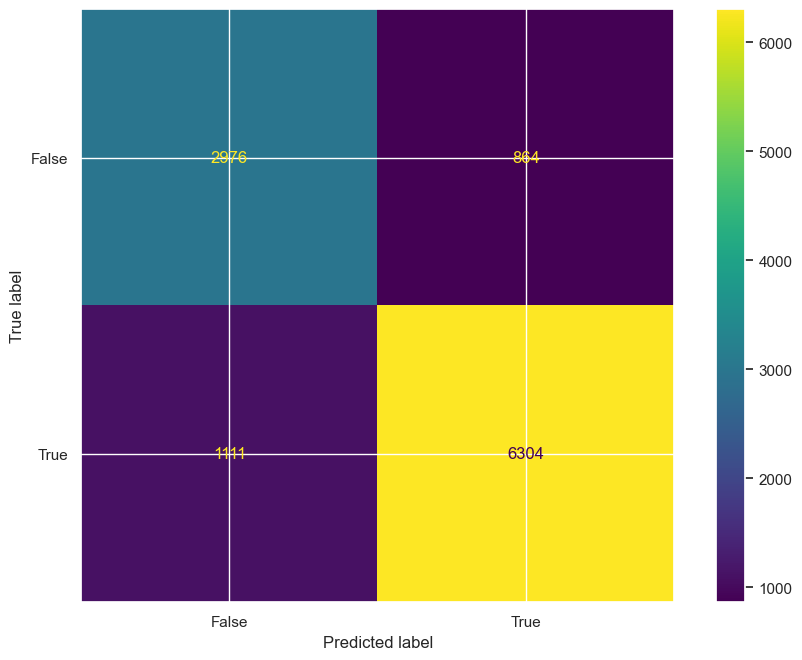

In [109]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [110]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4087
           1       0.85      0.88      0.86      7168

    accuracy                           0.82     11255
   macro avg       0.81      0.80      0.81     11255
weighted avg       0.82      0.82      0.82     11255



### XGBoost

In [111]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [112]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8647712127943137
0.8473567303420702


In [113]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80      4910
           1       0.81      0.95      0.88      6345

    accuracy                           0.85     11255
   macro avg       0.86      0.83      0.84     11255
weighted avg       0.86      0.85      0.84     11255



### Multinomial Naive Bayes

In [114]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8142825410928476
0.7471346068414039


In [115]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.31      0.85      0.46      1412
           1       0.97      0.73      0.84      9843

    accuracy                           0.75     11255
   macro avg       0.64      0.79      0.65     11255
weighted avg       0.89      0.75      0.79     11255



### Support Vector Machine

In [116]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9157929808973789
0.8469124833407374


In [117]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4077
           1       0.87      0.90      0.88      7178

    accuracy                           0.85     11255
   macro avg       0.84      0.83      0.83     11255
weighted avg       0.85      0.85      0.85     11255



### K-Nearest Neighbours

In [118]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9527099067081297
0.41412705464238114


In [119]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.35      0.49      9194
           1       0.19      0.70      0.30      2061

    accuracy                           0.41     11255
   macro avg       0.52      0.52      0.40     11255
weighted avg       0.72      0.41      0.46     11255



### Bagging Decision Tree (Ensemble Learning I)

In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9591514882274544
0.8310084406930254


In [121]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4160
           1       0.85      0.89      0.87      7095

    accuracy                           0.83     11255
   macro avg       0.82      0.81      0.82     11255
weighted avg       0.83      0.83      0.83     11255



### Boosting Decision Tree (Ensemble Learning II)

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=5000,learning_rate=0.6)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9735228787205686
0.8041759218125277


In [123]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      3874
           1       0.85      0.85      0.85      7381

    accuracy                           0.80     11255
   macro avg       0.78      0.78      0.78     11255
weighted avg       0.80      0.80      0.80     11255

